In [ ]:
%%bash
if ! conda env list | grep microexpressions; then
    conda env create -f environment.yml
else
    conda env update -f environment.yml
fi
conda activate micro_expressions

In [1]:
import sys
import os
PROJ_PATH = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(PROJ_PATH)

Device: cuda:0

image 1/1 d:\microexpressions\data\celeba\img_align_celeba\000007.jpg: 640x544 1 face, 11.3ms
Speed: 9.7ms preprocess, 11.3ms inference, 6.1ms postprocess per image at shape (1, 3, 640, 544)


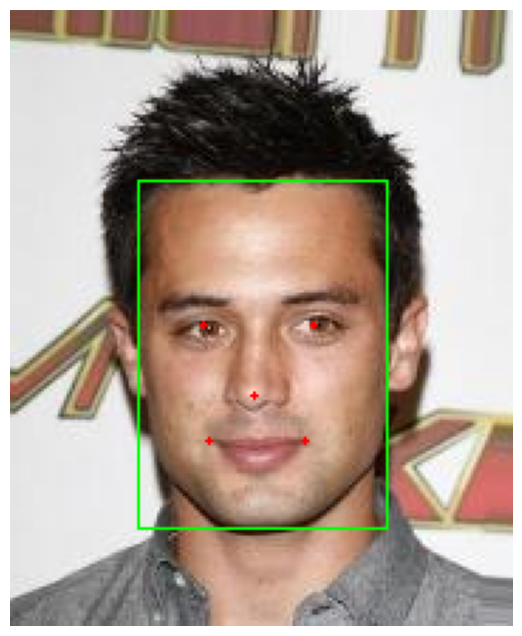

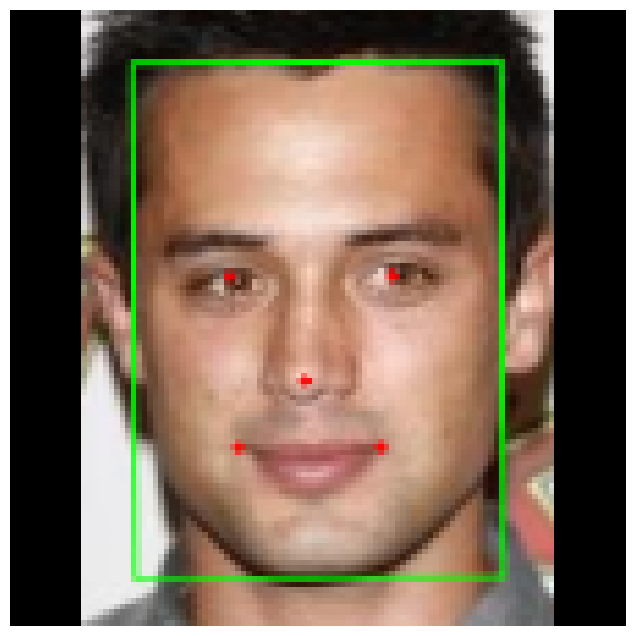

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from alignment import detect_faces, align_face
import yaml

with open(os.path.join(PROJ_PATH, "configs", "config.yaml"), "r") as f:
    config = yaml.safe_load(f)

DATA_DIR = os.path.join(PROJ_PATH, 'data')
MODEL_DIR = os.path.join(PROJ_PATH, 'model')

device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

image_path = os.path.join(DATA_DIR, "celeba/img_align_celeba", "000007.jpg")
model_path = os.path.join(MODEL_DIR, "yolov8n-face.pt")
image, detections = detect_faces(image_path, model_path, device)

for det in detections:
    x1, y1, x2, y2 = map(int, det["bbox"])
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 1)
    for x, y in det["landmarks"]:
        cv2.circle(image, (int(x), int(y)), 1, (0, 0, 255), -1)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

aligned_image = align_face(image, np.array(detections[0]["landmarks"]), detections[0]["bbox"])
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [ ]:
import shutil
input_dir = DATA_DIR
rejected_dir = r"D:\rej_dir" 

for filename in os.listdir(input_dir):
    if filename.lower().endswith(".jpg"):
        image_path = os.path.join(input_dir, filename)
        
        try:
            image, detections = detect_faces(image_path, device)

            if len(detections) > 0:
                landmarks = np.array(detections[0]['landmarks'])
                bbox = detections[0]['bbox']
                align_face(image, landmarks, bbox, output_size=(112, 112))
            else:
                raise ValueError("No face detected in the image")

        except ValueError as e:
            rejected_path = os.path.join(rejected_dir, filename)
            shutil.copy(image_path, rejected_path)
            print(f"Error in {filename}: {e}")


image 1/1 d:\microexpression_analysis\data\celeba\img_align_celeba\000001.jpg: 640x544 1 face, 24.6ms
Speed: 6.7ms preprocess, 24.6ms inference, 9.3ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 d:\microexpression_analysis\data\celeba\img_align_celeba\000002.jpg: 640x544 1 face, 40.4ms
Speed: 6.2ms preprocess, 40.4ms inference, 7.2ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 d:\microexpression_analysis\data\celeba\img_align_celeba\000003.jpg: 640x544 1 face, 17.6ms
Speed: 6.3ms preprocess, 17.6ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 544)
Error in 000003.jpg: Horizontal offset of keypoints is too large (offset_x_ratio=0.35), likely profile view

image 1/1 d:\microexpression_analysis\data\celeba\img_align_celeba\000004.jpg: 640x544 1 face, 23.7ms
Speed: 6.2ms preprocess, 23.7ms inference, 5.2ms postprocess per image at shape (1, 3, 640, 544)
Error in 000004.jpg: Horizontal offset of keypoints is too large (offset_x_ratio=0.28), like

C:\Users\SL-2577\AppData\Local\Temp\ipykernel_82004\2894224494.py:67: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 20))


image 1/1 d:\microexpression_analysis\data\celeba\img_align_celeba\000027.jpg: 640x544 1 face, 17.3ms
Speed: 5.9ms preprocess, 17.3ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 d:\microexpression_analysis\data\celeba\img_align_celeba\000028.jpg: 640x544 1 face, 14.6ms
Speed: 4.7ms preprocess, 14.6ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 d:\microexpression_analysis\data\celeba\img_align_celeba\000029.jpg: 640x544 1 face, 19.6ms
Speed: 2.8ms preprocess, 19.6ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 d:\microexpression_analysis\data\celeba\img_align_celeba\000030.jpg: 640x544 1 face, 9.6ms
Speed: 5.6ms preprocess, 9.6ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 544)

image 1/1 d:\microexpression_analysis\data\celeba\img_align_celeba\000031.jpg: 640x544 1 face, 11.3ms
Speed: 7.0ms preprocess, 11.3ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 544)

im

KeyboardInterrupt: 